# Custom OCR - training the neural network



# Importing the libraries

In [ ]:
import tensorflow
tensorflow.__version__

'2.8.0'

In [ ]:
import numpy as np
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Loading the datasets

## MNIST 0-9

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
28 * 28

784

In [ ]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [ ]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
train_labels[0]

5

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [ ]:
digits_data.shape

(70000, 28, 28)

In [ ]:
digits_labels.shape

(70000,)

In [ ]:
np.random.randint(0, digits_data.shape[0])

64377

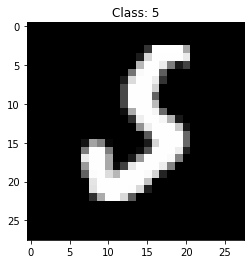

In [ ]:
index = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[index], cmap='gray')
plt.title('Class: ' + str(digits_labels[index]));

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


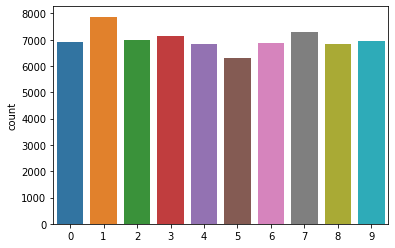

In [ ]:
sns.countplot(digits_labels);

## Kaggle A-Z

In [ ]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2022-04-04 15:29:32--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M  2.80MB/s    in 40s     

2022-04-04 15:30:13 (4.62 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [ ]:
zip_object = zipfile.ZipFile(file = '/content/alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
dataset_az = pd.read_csv('/content/A_Z Handwritten Data.csv').astype('float32')
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
alphabet_data = dataset_az.drop('0', axis = 1)
alphabet_labels = dataset_az['0']

In [ ]:
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [ ]:
alphabet_labels

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
372445    25.0
372446    25.0
372447    25.0
372448    25.0
372449    25.0
Name: 0, Length: 372450, dtype: float32

In [ ]:
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))

In [ ]:
alphabet_data.shape

(372450, 28, 28)

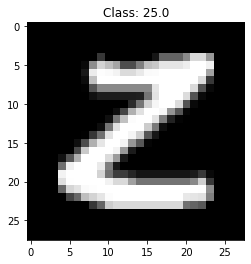

In [ ]:
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]));

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


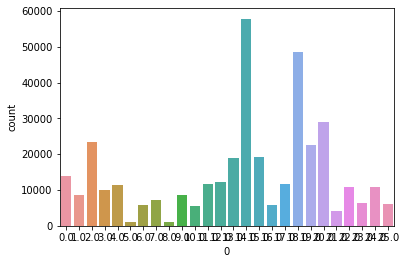

In [ ]:
sns.countplot(alphabet_labels);

## Joining the datasets

In [ ]:
digits_labels, np.unique(digits_labels)

(array([5, 0, 4, ..., 4, 5, 6], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [ ]:
alphabet_labels, np.unique(alphabet_labels)

(0          0.0
 1          0.0
 2          0.0
 3          0.0
 4          0.0
           ... 
 372445    25.0
 372446    25.0
 372447    25.0
 372448    25.0
 372449    25.0
 Name: 0, Length: 372450, dtype: float32,
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
       dtype=float32))

In [ ]:
alphabet_labels += 10

In [ ]:
alphabet_labels, np.unique(alphabet_labels)

(0         10.0
 1         10.0
 2         10.0
 3         10.0
 4         10.0
           ... 
 372445    35.0
 372446    35.0
 372447    35.0
 372448    35.0
 372449    35.0
 Name: 0, Length: 372450, dtype: float32,
 array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
        23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
       dtype=float32))

In [ ]:
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [ ]:
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [ ]:
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [ ]:
data = np.array(data, dtype = 'float32')

In [ ]:
data = np.expand_dims(data, axis = -1)

In [ ]:
data.shape

(442450, 28, 28, 1)

# Pre-processing the data

In [ ]:
data[0].min(), data[0].max()

(0.0, 255.0)

In [ ]:
data /= 255.0

In [ ]:
data[0].min(), data[0].max()

(0.0, 1.0)

In [ ]:
np.unique(labels), len(np.unique(labels)) # softmax

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32), 36)

In [ ]:
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [ ]:
np.unique(labels)

array([0, 1])

In [ ]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
labels[0], len(labels[0])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 36)

In [ ]:
labels[30000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# OneHotEncoder
# A, B, C
# 0, 1, 2

# A, B, C
# 1, 0, 0
# 0, 1, 0
# 0, 0, 1

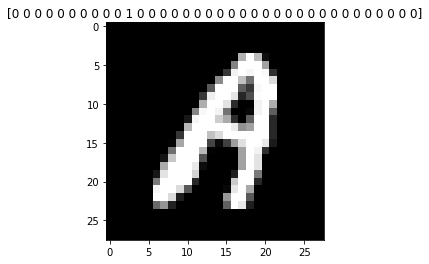

In [ ]:
plt.imshow(data[0].reshape(28,28), cmap='gray')
plt.title(str(labels[0]));

In [ ]:
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [ ]:
classes_total.max()

57825

In [ ]:
57825 / 6903

8.376792698826597

In [ ]:
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

In [ ]:
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

In [ ]:
X_train.shape, X_test.shape

((353960, 28, 28, 1), (88490, 28, 28, 1))

In [ ]:
y_train.shape, y_test.shape

((353960, 36), (88490, 36))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Buiding the neural network

- Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

network.add(Dense(36, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
2 * 2 * 128

512

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [ ]:
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

In [ ]:
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# Training the neural network

In [ ]:
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

In [ ]:
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [ ]:
len(X_train) // batch_size

2765

In [ ]:
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.2301 - accuracy: 0.8217
Epoch 1: val_loss improved from inf to 0.22813, saving model to custom_ocr.model
INFO:tensorflow:Assets written to: custom_ocr.model/assets
2765/2765 [==============================] - 273s 95ms/step - loss: 2.2301 - accuracy: 0.8217 - val_loss: 0.2281 - val_accuracy: 0.9161
Epoch 2/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.9823 - accuracy: 0.9000
Epoch 2: val_loss improved from 0.22813 to 0.18203, saving model to custom_ocr.model
INFO:tensorflow:Assets written to: custom_ocr.model/assets
2765/2765 [==============================] - 162s 59ms/step - loss: 0.9822 - accuracy: 0.9000 - val_loss: 0.1820 - val_accuracy: 0.9305
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8171 - accuracy: 0.9136
Epoch 3: val_loss did not improve from 0.18203
2765/2765 [==============================] - 163s 59ms/step - loss: 0.8171 - accuracy: 0.9136 - val_los

# Evaluating the neural network

In [ ]:
X_test.shape

(88490, 28, 28, 1)

In [ ]:
predictions = network.predict(X_test, batch_size=batch_size)

In [ ]:
predictions

array([[4.29383487e-01, 3.56615892e-08, 9.02159968e-07, ...,
        9.91089060e-14, 7.05523371e-06, 2.79850948e-10],
       [2.60604243e-25, 6.39023556e-10, 1.96721613e-13, ...,
        2.65546229e-09, 4.36424147e-10, 4.90267660e-10],
       [5.51023727e-10, 1.62349534e-09, 2.83566975e-10, ...,
        2.23201457e-09, 1.56610668e-07, 1.53938312e-16],
       ...,
       [3.62706810e-01, 2.89459456e-10, 5.69952086e-08, ...,
        9.33715530e-20, 1.03179410e-07, 8.24045346e-12],
       [1.86567080e-17, 3.11107883e-13, 3.07005033e-10, ...,
        9.99972105e-01, 2.66586972e-06, 7.18629670e-12],
       [1.14742676e-07, 1.87679754e-17, 4.16504331e-12, ...,
        8.08860917e-28, 1.83502532e-13, 7.65049898e-11]], dtype=float32)

In [ ]:
predictions[0]

array([4.29383487e-01, 3.56615892e-08, 9.02159968e-07, 4.81703788e-09,
       4.41709062e-06, 3.00428042e-07, 4.99979287e-05, 1.21775967e-08,
       1.36215922e-05, 3.01460241e-04, 2.95966288e-06, 1.94116842e-06,
       7.20353000e-06, 8.77907907e-04, 6.29938313e-07, 8.45943812e-13,
       3.15972975e-05, 1.05461673e-07, 6.86405880e-12, 4.02908772e-05,
       1.13681660e-08, 2.12734608e-06, 2.07739640e-06, 1.74157522e-05,
       5.53206146e-01, 8.76478953e-05, 1.58453993e-02, 2.75160858e-07,
       3.32517698e-06, 4.00368066e-07, 1.09625515e-04, 1.81573760e-08,
       1.63073025e-06, 9.91089060e-14, 7.05523371e-06, 2.79850948e-10],
      dtype=float32)

In [ ]:
len(predictions[0])

36

In [ ]:
np.argmax(predictions[0])

24

In [ ]:
name_labels[24]

'O'

In [ ]:
y_test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
np.argmax(y_test[0])

24

In [ ]:
name_labels[np.argmax(y_test[0])]

'O'

In [ ]:
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 18s 7ms/step - loss: 0.1767 - accuracy: 0.9392


[0.17666000127792358, 0.939236044883728]

In [ ]:
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.35      0.65      0.45      1381
           1       0.97      0.99      0.98      1575
           2       0.90      0.97      0.93      1398
           3       0.98      0.99      0.99      1428
           4       0.90      0.98      0.94      1365
           5       0.46      0.97      0.62      1263
           6       0.95      0.97      0.96      1375
           7       0.95      0.98      0.97      1459
           8       0.93      0.99      0.96      1365
           9       0.97      0.98      0.98      1392
           A       1.00      0.99      0.99      2774
           B       0.98      0.98      0.98      1734
           C       0.99      0.98      0.99      4682
           D       0.90      0.97      0.94      2027
           E       0.98      0.99      0.98      2288
           F       0.96      0.99      0.97       233
           G       0.97      0.94      0.95      1152
           H       0.98    

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

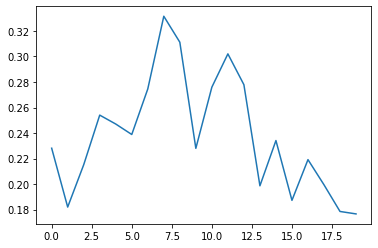

In [ ]:
plt.plot(history.history['val_loss']);

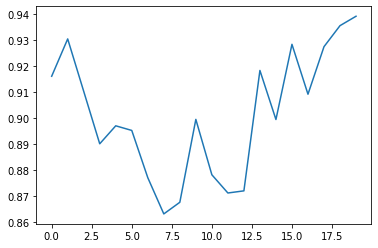

In [ ]:
plt.plot(history.history['val_accuracy']);

# Saving the neural network on Google Drive

In [ ]:
network.save('network', save_format= 'h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp network /content/drive/MyDrive/Cursos\ -\ recursos/OCR\ with\ Python/Models/network

# Testing the neural network with images

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
loaded_network = load_model('/content/drive/MyDrive/Cursos - recursos/OCR with Python/Models/network')

In [ ]:
loaded_network

In [ ]:
loaded_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/letter-m.jpg')
cv2_imshow(img)

In [ ]:
img.shape

(30, 30, 3)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(30, 30)

In [ ]:
cv2_imshow(gray)

In [ ]:
value, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2_imshow(thresh)

In [ ]:
value

137.0

In [ ]:
thresh.shape

(30, 30)

In [ ]:
img = cv2.resize(thresh, (28,28))
cv2_imshow(img)

In [ ]:
img.shape

(28, 28)

In [ ]:
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis = -1)
img.shape

(28, 28, 1)

In [ ]:
img = np.reshape(img, (1,28,28,1))
img.shape

(1, 28, 28, 1)

In [ ]:
prediction = loaded_network.predict(img)
prediction

array([[1.0748735e-14, 4.1491971e-10, 5.2274556e-11, 1.9275755e-15,
        1.0195320e-08, 2.4252422e-10, 2.9904919e-11, 1.0395567e-09,
        4.9130396e-17, 3.8198812e-11, 1.1468731e-07, 7.8467573e-11,
        1.6841060e-10, 4.5475921e-05, 8.7067499e-11, 2.1242543e-20,
        6.9531906e-12, 7.2673949e-08, 4.4421048e-23, 7.8578706e-11,
        2.8040145e-06, 6.8039002e-10, 9.9944478e-01, 4.8085314e-04,
        2.9721701e-11, 6.2563114e-12, 5.2386129e-12, 1.5448117e-07,
        1.0912476e-08, 3.7903069e-07, 9.2130512e-07, 1.8720147e-16,
        2.3859136e-05, 5.2621590e-07, 6.7358554e-09, 6.5605234e-12]],
      dtype=float32)

In [ ]:
np.argmax(prediction)

22

In [ ]:
name_labels[22]

'M'